In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams # this is use for show the correction to all the parameter
from matplotlib.cm import rainbow
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split




**#Import the Data**

In [3]:
heartData=pd.read_csv("heart_failure.csv"); # heartData is used for storing the dataset data information simply is a variable
heartData.head(300)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# After import the data the preprocess the data

In [5]:
heartData.shape # show the no.of row and columns

(299, 13)

In [6]:
heartData.info() # this is show the parameter information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Note:
Age :min=40 max=95
anaemia: in boolean 0 mean not and 1 mean present
creatinine_phosp:min=23 max=7861 in (mcg/l)
ejection fraction:min=14 max=80 in percentage
platelets:min=25.1k max=850k in kiloplateles
secrum creatinine:min=0.5 max=9.4 in mg/dl
secrum sodium:min=113 max=148 in mq/l  

In [7]:
#Note: Age :min=40 max=95
#anaemia: in boolean 0 mean not and 1 mean present
#creatinine_phosp:min=23 max=7861 in (mcg/l)
#ejection fraction:min=14 max=80 in percentage
#platelets:min=25.1k max=850k in kiloplateles
#secrum creatinine:min=0.5 max=9.4 in mg/dl
#secrum sodium:min=113 max=148 in mq/l



In [8]:
heartData.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
#Total Missing Percent of Data

In [10]:
missing_data= heartData.isnull().sum()

In [11]:

heartData['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [12]:
X=heartData.drop('DEATH_EVENT',axis=1)
y=heartData['DEATH_EVENT']

# **Data Visualization**

In [13]:
corr=heartData.corr()
corr.style.background_gradient(cmap='coolwarm') # shoew the correction after data is split


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [14]:
#Devide and split Data into Training ,Testing Classes

In [15]:
from sklearn.model_selection import train_test_split # import the module
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=10) # call the correct function name
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,40
183,75.0,0,99,0,38,1,224000.0,2.5,134,1,0,162
25,80.0,0,148,1,38,0,149000.0,1.9,144,1,1,23
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129
184,58.0,1,145,0,25,0,219000.0,1.2,137,1,1,170
...,...,...,...,...,...,...,...,...,...,...,...,...
156,52.0,1,58,0,35,0,277000.0,1.4,136,0,0,120
123,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95
15,82.0,1,379,0,50,0,47000.0,1.3,136,1,0,13
125,43.0,1,358,0,50,0,237000.0,1.3,135,0,0,97


In [16]:
X_train.shape

(269, 12)

In [17]:
X_test.shape

(30, 12)

In [18]:
y_train.shape

(269,)

In [19]:
y_test.shape

(30,)

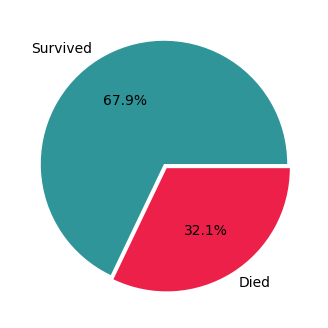

In [20]:
#How many patients survived after suffering from heart failure?

labels = 'Survived', 'Died'
sizes = [len(heartData[heartData['DEATH_EVENT']==0]),len(heartData[heartData['DEATH_EVENT']==1])]
explode = (0, 0.04)

fig1, ax = plt.subplots(figsize=(4,4))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
         colors=('#2F9599','#EC2049'))


plt.show()

In [21]:

model = LogisticRegression()
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
X_test_prediction = model.predict(X_test)
accuracy_score(X_test_prediction, y_test)


0.8333333333333334

In [24]:
input_data = (43,1,0,120,177,0,0,120,1,2.5,1,0)
np_data = np.asarray(input_data)
reshaped_df = np_data.reshape(1,-1)
pred = model.predict(reshaped_df)
if pred[0] == 0:
    print("the person doesnt have a heart disease")
else:
    print('the person does have a heart desease')

the person doesnt have a heart disease


In [25]:
#X_train_prediction = model.predict(X_train)
#accuracy_score(y_train_prediction, y_train)


In [26]:
X_test_prediction

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0])

In [27]:
X_test_prediction

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0])

In [28]:
Classifier = RandomForestClassifier()
# training the LogisticRegression model with Training data
Classifier=RandomForestClassifier(n_estimators=100,random_state=10)
Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [32]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
rf_accuracy =accuracy_score(rf_prediction, y_test)
print(rf_accuracy)



0.9


In [46]:
input_data = (49,1,80,0,30,1,427000,1.1,137,1,0,11)
np_data = np.asarray(input_data)
reshaped_df = np_data.reshape(1,-1)
pred = rf_model.predict(reshaped_df)
if pred[0] == 0:
    print("the person will not suffer from heart failure ")
else:
    print('the person will suffer from heart failure')

the person will not suffer from heart failure 


In [33]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
svc_accuracy = accuracy_score(svc_prediction, y_test)
print(svc_accuracy)

0.8333333333333334


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
knn_accuracy = accuracy_score(knn_prediction, y_test)
print(knn_accuracy)

0.8
